In [5]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.graph_objects as go


In [6]:
#Reading Districtwise data detailing Education in India
df=pd.read_csv(r'2015_16_Districtwise.csv')
df.head()

,AC_YEAR,STATCD,DISTCD,STATNAME,DISTNAME,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
0,2015-16,1,101,JAMMU & KASHMIR,KUPWARA,1,13,391,104,875564.0,...,21322,26,2594,3489,5315,27,62,23,852,239
1,2015-16,1,102,JAMMU & KASHMIR,BARAMULA,1,18,678,144,1015503.0,...,17307,0,1571,4127,5800,210,53,30,1665,360
2,2015-16,1,103,JAMMU & KASHMIR,SRINAGAR,1,8,94,65,1269751.0,...,5444,31,408,817,3284,886,11,0,2873,40
3,2015-16,1,104,JAMMU & KASHMIR,BADGAM,1,13,523,104,735753.0,...,12469,18,857,2290,3837,119,45,8,1035,325
4,2015-16,1,105,JAMMU & KASHMIR,PULWAMA,1,8,359,64,570060.0,...,7408,17,855,1688,2584,151,67,5,1101,209


In [7]:
df.columns

Index(['AC_YEAR', 'STATCD', 'DISTCD', 'STATNAME', 'DISTNAME', 'DISTRICTS',
       'BLOCKS', 'VILLAGES', 'CLUSTERS', 'TOTPOPULAT',
       ...
       'UUNI_ALL', 'UUNI_SC', 'UUNI_ST', 'TOTCLS1G', 'TOTCLS2G', 'TOTCLS3G',
       'TOTCLS4G', 'TOTCLS5G', 'TOTCLS6G', 'TOTCLS7G'],
      dtype='object', length=819)

In [10]:
#Reading the Districtwise Metadata which allows us to see what each column head means
ad=pd.read_csv(r'2015_16_Districtwise_metadata.csv')
ad.tail(10)

,Field Name,Description
811,UUNI_ALL,Incentives_Upper_Primary_Uniform: All_
812,UUNI_SC,Incentives_Upper_Primary_Uniform: SC
813,UUNI_ST,Incentives_Upper_Primary_Uniform: ST
814,TOTCLS1G,Total_Classrooms_Primary_Only: Primary_Only
815,TOTCLS2G,Total_Classrooms_Primary_with_Upper_Primary: P...
816,TOTCLS3G,Total_Classrooms_Primary_with_upper_Primary_Se...
817,TOTCLS4G,Total_Classrooms_Upper_Primary_Only: Upper_Pri...
818,TOTCLS5G,Total_Classrooms_Upper_Primary_with_Sec./H.Sec...
819,TOTCLS6G,Total_Classrooms_Primary_with_upper_Primary_Se...
820,TOTCLS7G,Total_Classrooms_Upper_Primary_with_Sec.: Uppe...


In [11]:
ad[ad['Field Name']=='TOTCLS1G']['Description']

814    Total_Classrooms_Primary_Only: Primary_Only
Name: Description, dtype: object

In [17]:
df.describe()

,STATCD,DISTCD,DISTRICTS,BLOCKS,VILLAGES,CLUSTERS,TOTPOPULAT,P_URB_POP,POPULATION_0_6,GROWTHRATE,...,UUNI_ALL,UUNI_SC,UUNI_ST,TOTCLS1G,TOTCLS2G,TOTCLS3G,TOTCLS4G,TOTCLS5G,TOTCLS6G,TOTCLS7G
count,680.000000,680.000000,680.0,680.000000,680.000000,680.000000,6.340000e+02,631.000000,6.330000e+02,634.000000,...,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,17.292647,1745.976471,1.0,10.760294,874.614706,121.226471,1.899024e+06,24.819255,2.494264e+05,17.627886,...,46465.307353,11444.252941,5485.394118,4530.914706,3180.994118,764.154412,898.879412,391.352941,717.679412,385.957353
std,9.451743,944.257509,0.0,9.585360,622.711657,94.040172,1.547475e+06,19.093744,1.985112e+05,11.346020,...,57485.560854,16548.586787,9455.045146,3881.154776,3332.333288,1330.305834,1425.313485,820.868908,1194.616699,935.196354
min,1.000000,101.000000,1.0,1.000000,6.000000,1.000000,7.948000e+03,-25.350000,1.103980e+03,-58.390000,...,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,937.750000,1.0,5.000000,390.750000,56.750000,8.226940e+05,11.375000,1.087804e+05,12.052500,...,7534.000000,736.750000,165.250000,1903.750000,674.750000,68.000000,17.000000,17.000000,137.000000,20.750000
50%,18.000000,1823.500000,1.0,8.000000,785.500000,101.000000,1.564392e+06,19.500000,2.040779e+05,17.055000,...,32185.500000,6816.500000,1321.000000,3555.000000,1922.500000,249.500000,129.500000,70.500000,407.000000,115.500000
75%,24.000000,2413.250000,1.0,13.000000,1204.250000,162.500000,2.587520e+06,32.420000,3.378675e+05,22.740000,...,60492.750000,15300.500000,6183.500000,5944.250000,4870.500000,887.750000,1383.000000,462.000000,824.500000,319.500000
max,36.000000,3610.000000,1.0,66.000000,3963.000000,592.000000,1.105413e+07,100.000000,1.256855e+06,111.010000,...,511213.000000,153047.000000,68723.000000,24728.000000,25677.000000,16053.000000,8590.000000,8074.000000,15458.000000,11904.000000


In [18]:
df1=df.copy().set_index('DISTNAME')[['OVERALL_LI']]
df1

,OVERALL_LI
DISTNAME,
KUPWARA,66.92
BARAMULA,66.93
SRINAGAR,71.21
BADGAM,57.98
PULWAMA,65.00
...,...
RANGA REDDY,78.05
MAHBUBNAGAR,56.06
NALGONDA,65.05


In [19]:
df1.describe()

,OVERALL_LI
count,634.000000
mean,73.395189
std,10.098460
min,37.220000
25%,66.437500
50%,73.490000
75%,80.815000
max,98.760000


In [20]:
#Finding out the district with highest literacy rate
df1.idxmax()

OVERALL_LI    SERCHHIP
dtype: object

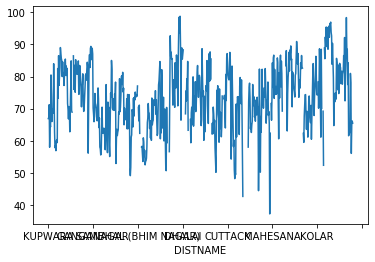

In [21]:
df1['OVERALL_LI'].plot()
plt.show()

In [22]:
df2=df.copy()[['STATNAME','OVERALL_LI']]
lit=df2.groupby(['STATNAME']).mean()
lit=lit.sort_values('OVERALL_LI',ascending=False)
lit

,OVERALL_LI
STATNAME,
KERALA,93.648571
LAKSHADWEEP,92.280000
MIZORAM,89.436250
PUDUCHERRY,88.142500
TRIPURA,87.357500
GOA,87.190000
DELHI,86.734444
CHANDIGARH,86.430000
DAMAN & DIU,85.710000


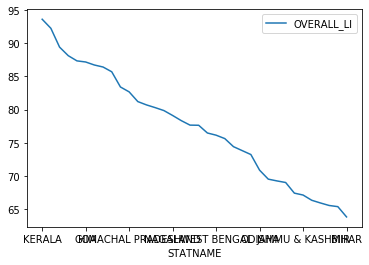

In [23]:
lit.plot()
plt.show()